## Laboratorio 2 Agrupacion 

Integrantes: Nicolás Arango (202220342), Amalia Carbonell (202122079), Mateo Rincón (202221402)

Este notebook se encuentra dividido en las siguientes secciones:

1. Preparacion de los datos 
2. Modelamiento 
3. Validacion cualitativa 
4. Validacion Cuantitativa 

### Preparacion de los datos 

In [ ]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns  

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.model_selection import ParameterGrid
from sklearn.decomposition import PCA



In [2]:
data_df = pd.read_csv("202510_Laboratorio 2 - Agrupación_Customer_Data.csv",sep=';', encoding = "ISO-8859-1")

In [3]:
data_df.shape

(8950, 18)

In [4]:
data_df.head(5)

,ID,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
0,C10001,5323.148883,0.250693,26344.07220,38237.442520,3727.113162,15708.239680,0.496536,0.464442,0.821611,0.194502,100,77,16819.48004,21337.027460,39452.95812,0.817907,7
1,C10002,12726.638120,0.791307,37958.51902,5690.742440,18733.810960,38284.354430,0.699457,0.250327,0.654863,1.083902,78,156,15617.57058,8000.183624,63013.74848,0.343119,9
2,C10003,4305.572068,0.176531,28392.95334,36009.470090,2873.383232,14294.185030,0.419764,0.523662,0.899912,0.207049,72,81,15515.58621,27111.360490,NaN,0.829074,6
3,C10004,4740.988511,0.178076,27399.00384,38246.863490,3402.853375,6936.812518,0.439666,0.606597,0.783129,0.228299,78,83,12926.58797,23919.113400,38444.21998,0.883984,7
4,C10005,13820.920640,0.826914,42214.02163,7341.007821,19273.070990,40091.347850,0.821412,0.283579,0.501361,1.106350,88,182,14404.70507,6994.688474,62041.61734,0.383186,10


In [5]:
data_df.info

<bound method DataFrame.info of           ID         SALDO   F_SALDO       COMPRAS  COMPRAS_PUNTUALES  \
0     C10001   5323.148883  0.250693  26344.072200       38237.442520   
1     C10002  12726.638120  0.791307  37958.519020        5690.742440   
2     C10003   4305.572068  0.176531  28392.953340       36009.470090   
3     C10004   4740.988511  0.178076  27399.003840       38246.863490   
4     C10005  13820.920640  0.826914  42214.021630        7341.007821   
...      ...           ...       ...           ...                ...   
8945  C18946   6095.221156  0.234346  27094.007820       35917.204380   
8946  C18947  12682.575820  0.686025  38433.618850        5293.541956   
8947  C18948  16464.311410  0.189136   4296.196384       32554.759640   
8948  C18949  15531.883780  0.117118  12219.325650       31795.971700   
8949  C18950   5852.488566  0.166820  32480.936200       32368.357730   

      COMPRAS_PLAZOS  AVANCE_EFECTIVO  F_COMPRAS  F_COMPRAS_PUNTUALES  \
0        3727.1131

In [6]:
data_df.dtypes

ID                      object
SALDO                  float64
F_SALDO                float64
COMPRAS                float64
COMPRAS_PUNTUALES      float64
COMPRAS_PLAZOS         float64
AVANCE_EFECTIVO        float64
F_COMPRAS              float64
F_COMPRAS_PUNTUALES    float64
F_COMPRAS_PLAZOS       float64
F_AVANCE_EFECTIVO      float64
P_AVANCE_EFECTIVO        int64
P_COMPRAS                int64
LÍMITE_CREDITO         float64
PAGOS                  float64
PAGOS_MINIMOS          float64
F_PAGOS_COMPLETOS      float64
MESES_CLIENTE            int64
dtype: object

### Completitud 
Haremos un analisis de completitud para poder determinar si hay datos que tengan valores nulos en los datos. Podemos ver que hay 2 variables que no tienen una completitud del 100%, siengo pagos minimos y limite de credito. Reemplazaremos los valores nulos por las medias en cada uno de los conjuntos. 

In [7]:
analisisComplet =  (100 * data_df.isnull().sum() / data_df.shape[0]).sort_values(ascending=False)
pd.DataFrame({
    "Atributo": analisisComplet.index,
    "Completitud (%)": 100 - analisisComplet.values
})

,Atributo,Completitud (%)
0,PAGOS_MINIMOS,96.502793
1,LÍMITE_CREDITO,99.988827
2,ID,100.000000
3,SALDO,100.000000
4,F_PAGOS_COMPLETOS,100.000000
5,PAGOS,100.000000
6,P_COMPRAS,100.000000
7,P_AVANCE_EFECTIVO,100.000000
8,F_AVANCE_EFECTIVO,100.000000
9,F_COMPRAS_PLAZOS,100.000000


In [8]:
data_df['LÍMITE_CREDITO'].fillna(data_df['LÍMITE_CREDITO'].median(), inplace=True)
data_df['PAGOS_MINIMOS'].fillna(data_df['PAGOS_MINIMOS'].median(), inplace=True)

#data_df = data_df.dropna()


/var/folders/zp/n5brtxpj49d0g2j2vx4jdhc40000gn/T/ipykernel_19938/3421392460.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_df['LÍMITE_CREDITO'].fillna(data_df['LÍMITE_CREDITO'].median(), inplace=True)
/var/folders/zp/n5brtxpj49d0g2j2vx4jdhc40000gn/T/ipykernel_19938/3421392460.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object o

### Unicidad 
Haremos un analisis de unicidad para verificar la cantidad de lineas duplicadas que tienen los datos. En este caso no hay datos duplicados. 

In [9]:
total_rows = data_df.shape[0]
total_rows
print(f"Cantidad de filas duplicadas: {(data_df.duplicated().sum())}")
print(f"Porcentaje de filas duplicadas: {(data_df.duplicated().sum()/total_rows)*100:.4f}%")

#star_df = data_df.drop_duplicates()

Cantidad de filas duplicadas: 0
Porcentaje de filas duplicadas: 0.0000%


### Validez 

Entre las variables del proyecto, se nos dice que F_SALDO', 'F_COMPRAS', 'F_COMPRAS_PUNTUALES', 'F_COMPRAS_PLAZOS' 'F_AVANCE_EFECTIVO', 'F_PAGOS_COMPLETOS' deben estar entre 1 y 0. 1 indicando que si compro son frecuencia y 0 si no compro con frecuencia. Las siguientes graficas nos permiten visualizar los valores que estas variables toman y si tenemos valores mayores a 1. Solo F_AVANCE_EFECTIVO tiene valores mayores a 1. 

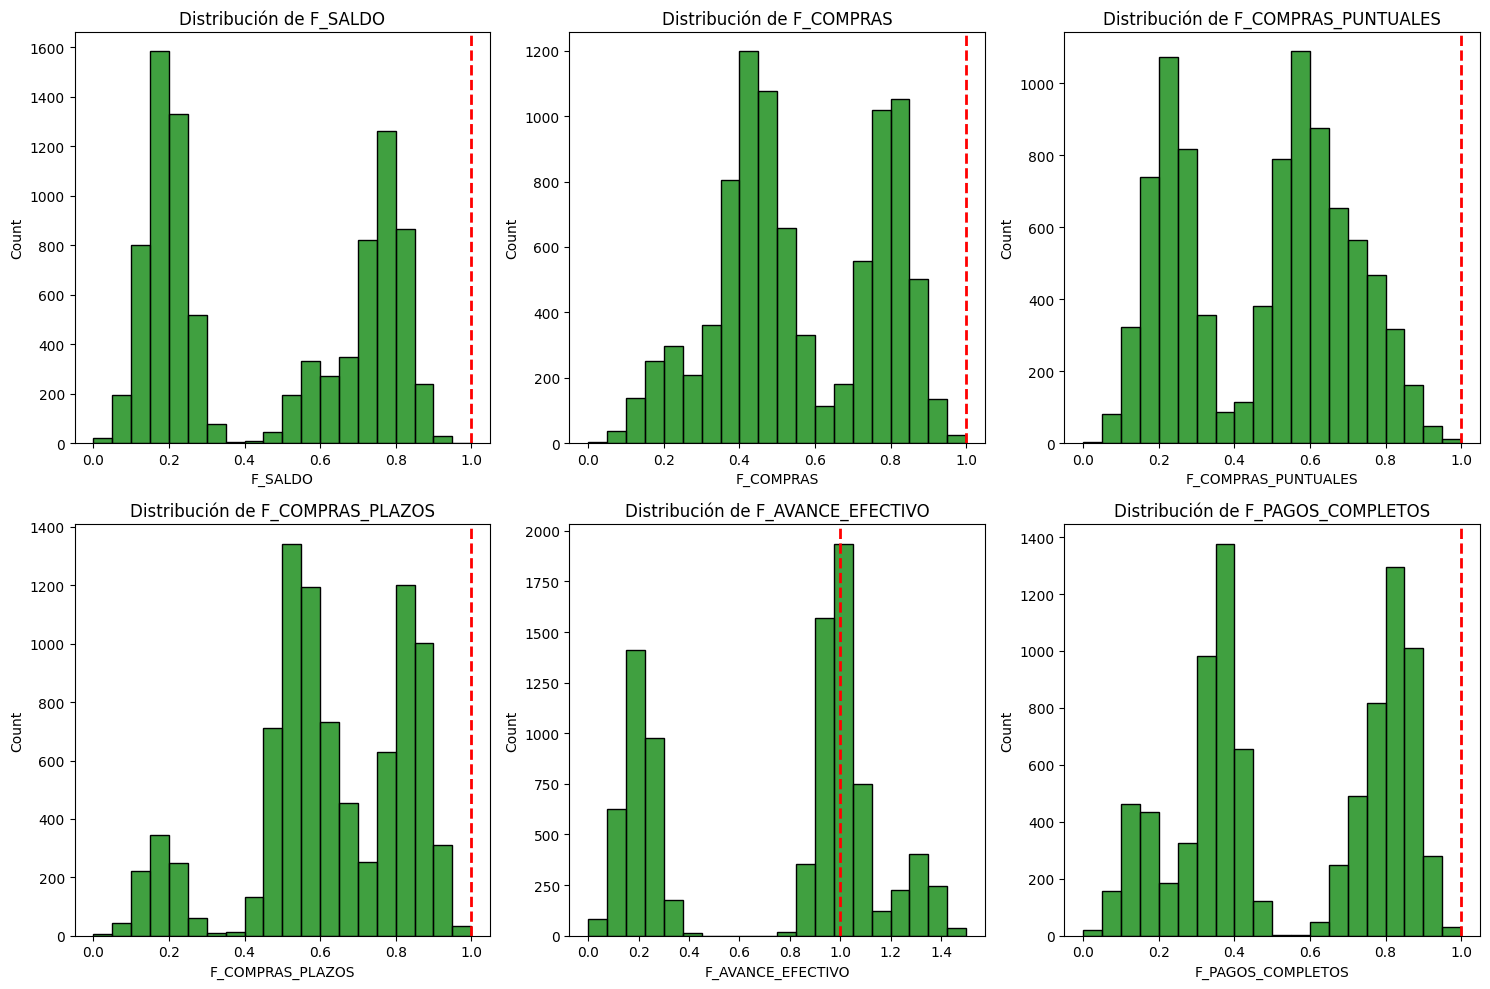

In [10]:

Col = ['F_SALDO', 'F_COMPRAS', 'F_COMPRAS_PUNTUALES', 'F_COMPRAS_PLAZOS', 
           'F_AVANCE_EFECTIVO', 'F_PAGOS_COMPLETOS']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(Col):
    sns.histplot(data_df[col], bins=20, color="green", ax=axes[i])  
    axes[i].axvline(x=1, color="red", linestyle="--", linewidth=2) 
    axes[i].set_title(f"Distribución de {col}", fontsize=12)

plt.tight_layout()
plt.show()


Analizaremos cuantos valores hay mayores a uno para identificar el correcto manejo que se les tiene que dar. 

In [11]:
num_errores = (data_df['F_AVANCE_EFECTIVO'] > 1).sum()
print(f"Número de registros fuera de rango: {num_errores}")
porcentaje= (num_errores/data_df.shape[0])*100
print ("Porcentaje de valores fuera de rango: " + str(porcentaje))


Número de registros fuera de rango: 3040
Porcentaje de valores fuera de rango: 33.96648044692737


Con un porcentaje del 34% son demasiados datos para ser eliminados por lo que los valores mayores a 1 seran reemplazados por 1 ya que 1 en este caso significa que si compro con frecuencia. Los reemplazaremos con la siguiente linea de codigo. 

In [12]:
data_df.loc[data_df['F_AVANCE_EFECTIVO'] > 1, 'F_AVANCE_EFECTIVO'] = 1

In [13]:
num_errores = (data_df['F_AVANCE_EFECTIVO'] > 1).sum()
print(f"Nuevo Número de registros fuera de rango: {num_errores}")
porcentaje= (num_errores/data_df.shape[0])*100
print ("Nuevo Porcentaje de valores fuera de rango: " + str(porcentaje))

Nuevo Número de registros fuera de rango: 0
Nuevo Porcentaje de valores fuera de rango: 0.0


### Escalamiento y analisis de datos  

Se analizarán las variables para identificar y tratar los valores atípicos, con el objetivo de mejorar la coherencia de los clusters y evitar que los datos extremos afecten la segmentación.

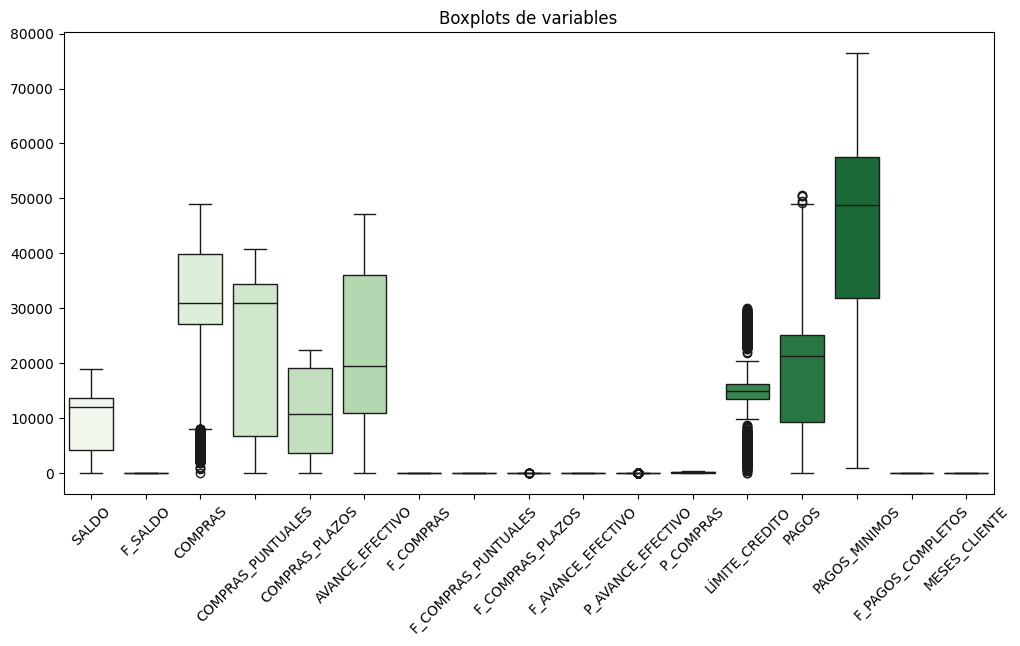

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_df[data_df.columns], palette="Greens")
plt.xticks(rotation=45)
plt.title("Boxplots de variables")
plt.show()


In [15]:
def contar_outliers_iqr(df):
    outliers_por_variable = {}
    
    for columna in df.select_dtypes(include=np.number): 
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
        outliers_por_variable[columna] = len(outliers)
    
    return outliers_por_variable

outliers = contar_outliers_iqr(data_df)
df_outliers = pd.DataFrame(outliers.items(), columns=["Variable", "Cantidad de Outliers"])
df_outliers
print(df_outliers)

               Variable  Cantidad de Outliers
0                 SALDO                     0
1               F_SALDO                     0
2               COMPRAS                   755
3     COMPRAS_PUNTUALES                     0
4        COMPRAS_PLAZOS                     0
5       AVANCE_EFECTIVO                     0
6             F_COMPRAS                     0
7   F_COMPRAS_PUNTUALES                     0
8      F_COMPRAS_PLAZOS                    19
9     F_AVANCE_EFECTIVO                     0
10    P_AVANCE_EFECTIVO                   253
11            P_COMPRAS                     0
12       LÍMITE_CREDITO                  2184
13                PAGOS                     5
14        PAGOS_MINIMOS                     0
15    F_PAGOS_COMPLETOS                     0
16        MESES_CLIENTE                     0


Cuando calculamos los outliers nos podemos dar cuenta que hay variables que tienen bastantes, en especial LIMITE_CREDITO con 2184. En este caso los outliers no se van a eliminar pues primero presentan un 24% de todos los datos y podria crear un sesgo. Adicionalmente, estos valores elevados del limite de credito puede mostrarnos algun patron significativo o inclusive un cluster de clientes mas adelante. 

Antes de poder escalar los datos se necesita eliminar la columna de ID pues en este caso no nos es util. 

In [16]:
data_df_numeric = data_df.drop(columns=['ID'])

### Escalar datos 

Se escalarán los datos para asegurar que todas las variables tengan la misma influencia en el análisis, evitando que aquellas con valores más grandes dominen el clustering. Para ello, se utilizará StandardScaler, que normaliza los datos con media 0 y desviación estándar 1.

In [17]:
print(data_df_numeric.dtypes)

SALDO                  float64
F_SALDO                float64
COMPRAS                float64
COMPRAS_PUNTUALES      float64
COMPRAS_PLAZOS         float64
AVANCE_EFECTIVO        float64
F_COMPRAS              float64
F_COMPRAS_PUNTUALES    float64
F_COMPRAS_PLAZOS       float64
F_AVANCE_EFECTIVO      float64
P_AVANCE_EFECTIVO        int64
P_COMPRAS                int64
LÍMITE_CREDITO         float64
PAGOS                  float64
PAGOS_MINIMOS          float64
F_PAGOS_COMPLETOS      float64
MESES_CLIENTE            int64
dtype: object


In [18]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_df_numeric), columns=data_df_numeric.columns)

data_scaled.head()

,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
0,-0.793157,-0.736841,-0.378759,1.128976,-1.083823,-0.545137,-0.295615,-0.061255,0.949565,-1.319478,1.070583,-1.233650,0.383424,0.136663,-0.323927,1.018938,-0.780560
1,0.653451,1.173579,0.673198,-1.268896,1.033761,1.247530,0.652425,-1.026343,0.148646,0.822925,0.082249,-0.125935,0.166334,-1.068257,1.224332,-0.756449,0.358433
2,-0.991986,-0.998912,-0.193185,0.964831,-1.204293,-0.657421,-0.654292,0.205667,1.325661,-1.286106,-0.187296,-1.177563,0.147914,0.658347,0.289002,1.060697,-1.350057
3,-0.906908,-0.993452,-0.283211,1.129670,-1.129579,-1.241636,-0.561306,0.579486,0.764729,-1.229587,0.082249,-1.149519,-0.319713,0.369943,-0.390215,1.266023,-0.780560
4,0.867269,1.299407,1.058633,-1.147313,1.109855,1.391015,1.222197,-0.876465,-0.588652,0.822925,0.531492,0.238629,-0.052735,-1.159099,1.160450,-0.606625,0.927929


En la siguiente grafica podemos ver la nueva distribucion de las variables. En esta nueva estandarizacion la mayoria de las variables tienen una distribucion al rededor del 0 por lo que asumimos que la estandarizacion funciono. Alguna de las variables presentan valores atipicos que nos demuestra que hay clientes con comportamientos de compra extremos con variables como "COMPRAS", "P_AVANCE_EFECTIVO" y "LÍMITE_CREDITO". 

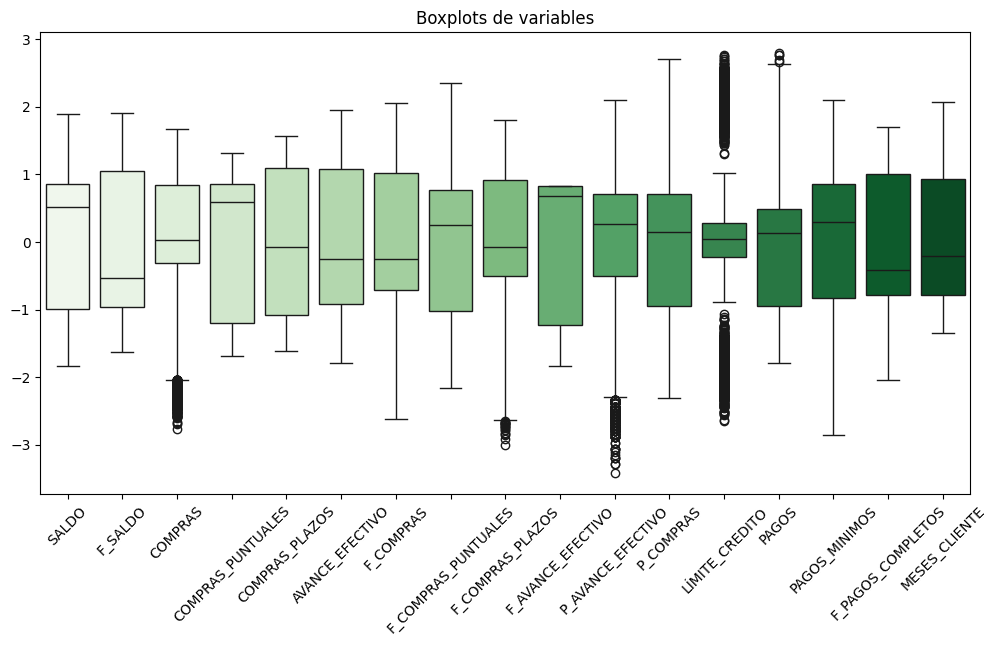

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_scaled[data_scaled.columns], palette="Greens")
plt.xticks(rotation=45)
plt.title("Boxplots de variables")
plt.show()

## Modelamiento 

Algoritmos aplicados: 
- Amalia Carbonell - K Means 
- Mateo Rincon - DBSCAN
- Nicolas Arango - MeanShift

### K Means 

Utilizaremos el algoritmo de K-Means para segmentar a los clientes por su comportameinto financiero y agruparlos en clusters. De esta manera identificaremos patrones de los datos. Para determinar el número óptimo de clusters, aplicaremos el método del codo, el valor de la silueta y las graficas de . El punto donde la grafica se vuelve menos pronunciada indica el número ideal de clusters. 

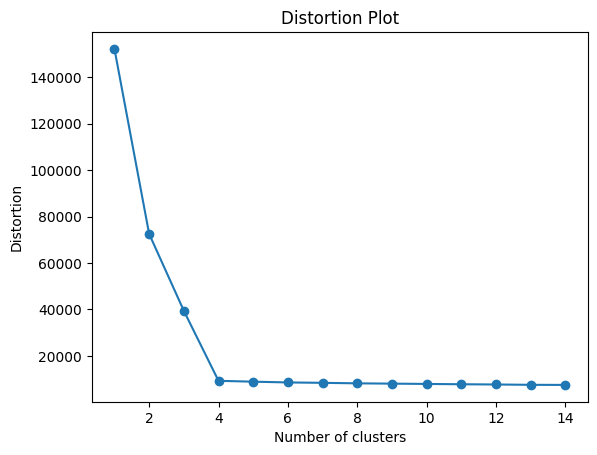

In [20]:
def plot_distortion(data,
                    k_min=1, 
                    k_max=11,
                    ylabel = 'Distortion',
                    xlabel = 'Number of clusters',
                    title = 'Distortion Plot'):
    distortions = []
    for i in range(k_min, k_max):
        km = KMeans(n_clusters=i,
                 init='k-means++',
                 n_init=10,
                 max_iter=300,
                 random_state=0)
        km.fit(data)
        distortions.append(km.inertia_)
    plt.plot(range(k_min,k_max), distortions, marker='o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

plot_distortion(data_scaled[data_scaled.columns],1,15)

Con el metodo del codo nos damos cuenta que el mejor numero de clusters es 4. Lo plantearemos con 4 clusters pero igual analizaremos si esto podria mejorar. 

In [21]:
kmeans = KMeans(n_clusters=4, random_state=0) 
res_kmeans = kmeans.fit(data_scaled[data_scaled.columns])
res_kmeans.labels_

array([0, 1, 0, ..., 2, 2, 0], shape=(8950,), dtype=int32)

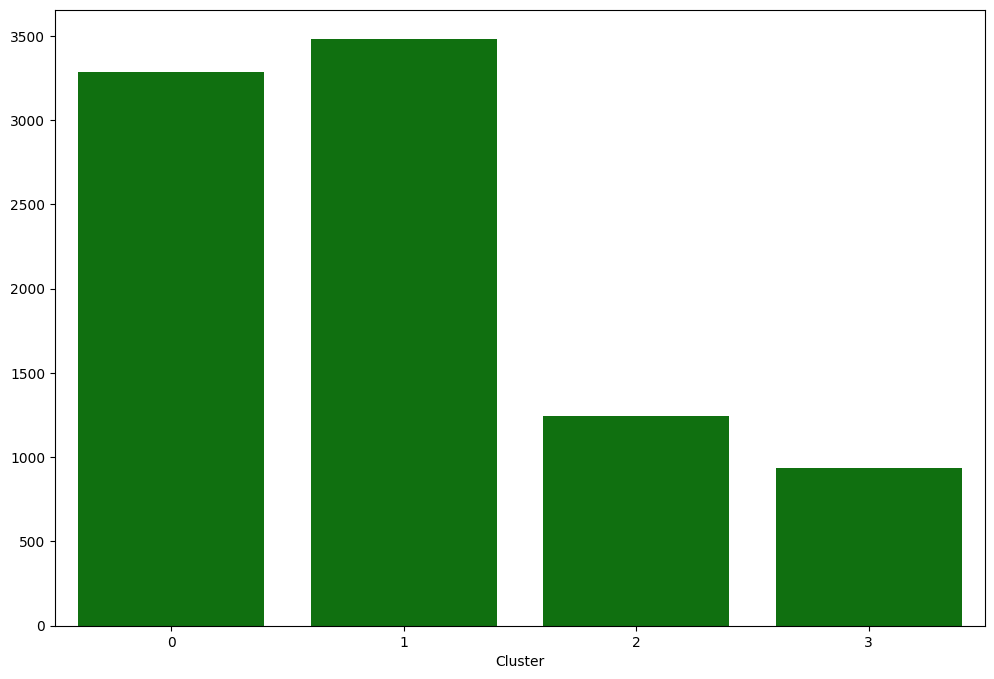

In [22]:
labels = res_kmeans.labels_
data_scaled['Cluster'] = labels

cluster_distrib = data_scaled['Cluster'].value_counts()

fig=plt.figure(figsize=(12,8))
sns.barplot(x=cluster_distrib.index, y=cluster_distrib.values, color = 'green');


Visualizamos como se distribuyen los valores en los diferentes clusters con la grafica mostrada anteriormente. El cluster 0 y el 1 son los que mas valores toman. En la siguiente grafica podemos ver la cantidad de valores que hay en cada uno de los clusters. 

In [23]:
data_scaled.groupby('Cluster').count()


,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
Cluster,,,,,,,,,,,,,,,,,
0,3284,3284,3284,3284,3284,3284,3284,3284,3284,3284,3284,3284,3284,3284,3284,3284,3284
1,3481,3481,3481,3481,3481,3481,3481,3481,3481,3481,3481,3481,3481,3481,3481,3481,3481
2,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247
3,938,938,938,938,938,938,938,938,938,938,938,938,938,938,938,938,938


In [24]:
cols_number = data_scaled.to_numpy()
cols_number

array([[-0.79315665, -0.73684059, -0.3787591 , ...,  1.01893777,
        -0.78056013,  0.        ],
       [ 0.65345113,  1.17357881,  0.67319846, ..., -0.75644908,
         0.3584328 ,  1.        ],
       [-0.99198648, -0.99891229, -0.19318539, ...,  1.06069728,
        -1.35005659,  0.        ],
       ...,
       [ 1.38377531, -0.9543688 , -2.37570566, ..., -1.55620595,
        -0.21106366,  2.        ],
       [ 1.20158324, -1.20886635, -1.65808253, ..., -1.71248651,
        -0.21106366,  2.        ],
       [-0.68972611, -1.03323094,  0.17707628, ...,  1.02671238,
        -0.78056013,  0.        ]], shape=(8950, 18))

In [25]:
#sns.pairplot(data=data_scaled, hue="Cluster")


In [26]:
def plot_silhouette(data, 
                    labels,
                   ylabel = 'Grupos',
                   xlabel = "Coeficiente de silueta",
                   title = 'Gráfica de silueta'):
    cluster_labels = np.unique(labels)
    print(cluster_labels)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data,
                                        labels,
                                        metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[labels == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper),
                        c_silhouette_vals,
                        height=1.0,
                        edgecolor='none',
                        color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg,
                color="red",
                linestyle="--")
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()


Analizaremos el numero ideal de clusters que podria tener estos datos por medio de las graficas de siluetas. Se graficaran para valores de 2 a 7 clusters. Mostraremos la grafica y el silhouette score que nos permite analizar el modelo. Estamos buscando un valor cercano a 1 pues nos indica un buen modelo. 

Número de Clusters: 2, Silhouette Score: 0.527
[0 1]


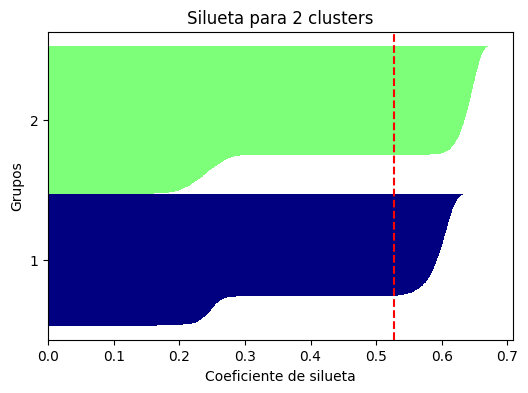

Número de Clusters: 3, Silhouette Score: 0.635
[0 1 2]


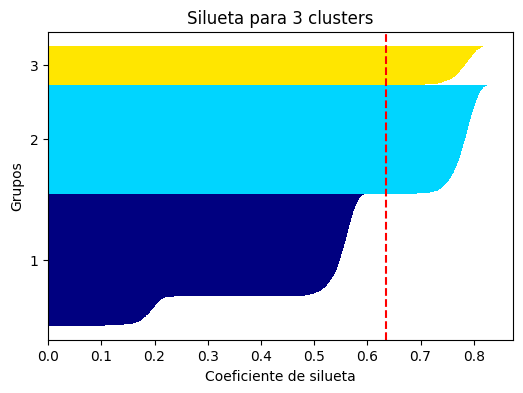

Número de Clusters: 4, Silhouette Score: 0.780
[0 1 2 3]


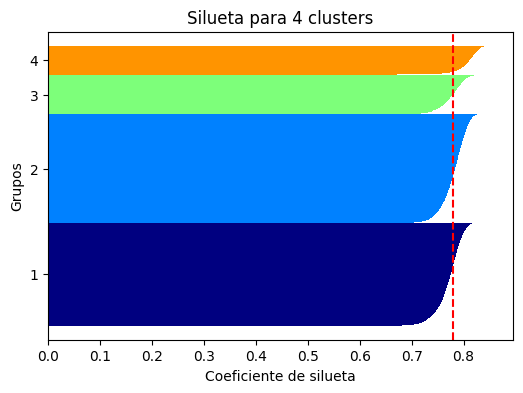

Número de Clusters: 5, Silhouette Score: 0.514
[0 1 2 3 4]


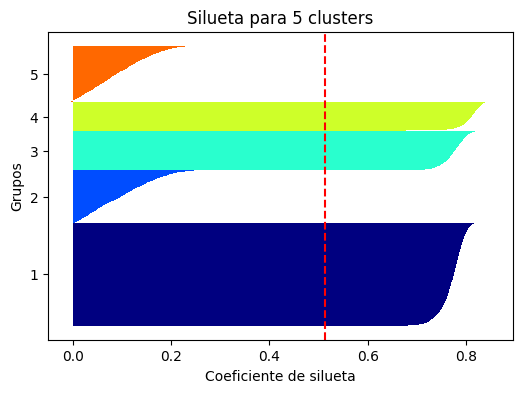

Número de Clusters: 6, Silhouette Score: 0.505
[0 1 2 3 4 5]


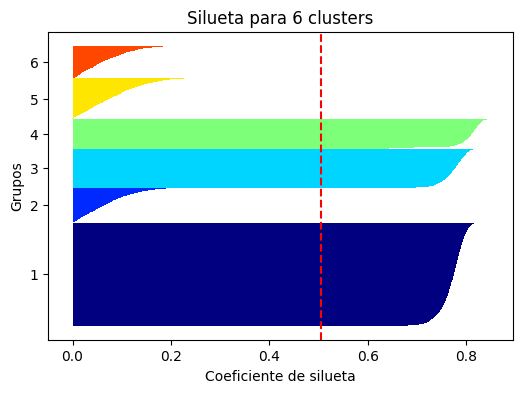

In [27]:
for n_clusters in range(2, 7):  
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    print(f"Número de Clusters: {n_clusters}, Silhouette Score: {silhouette_score(data_scaled, cluster_labels):.3f}")
    plt.figure(figsize=(6, 4))
    plot_silhouette(data=data_scaled, labels=cluster_labels, title=f'Silueta para {n_clusters} clusters')

Vemos como las unicas graficas que tienen todos sus clusters arriba de la raya roja son las graficas de 4 y 2 clusters. Viendo los valores del silhouette score, la grafica de 2 clusters tiene un valor de 0,635 mientras que 4 clusters dan un valor de 0,78. Los 4 clusters tienen un valor mas cercano a 1, el cual nos identifica un buen modelo. 


In [28]:
def plot_selectK_silhoute(data,
                    k_min=1, 
                    k_max=11,
                    ylabel = 'Silhouette Coefficient',
                    xlabel = 'Number of clusters',
                    style = 'fivethirtyeight'):
    '''
    Graficar el codo de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    k_min : int
        Valor mínimo para k
    k_max : int
        Valor máximo para k
    xlabel : string
        La etiqueta del eje x
    ylabel  string
        La etiqueta del eje y    
    title : string
        El titulo de la gráfica  
    '''
    # Crear una lista para almacenar los coeficientes de la silueta para cada valor de k analizado

    silhouette_coefficients = []

    # Notice you start at 2 clusters for silhouette coefficient
    for k in range(k_min, k_max):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(data)
        score = silhouette_score(data, kmeans.labels_)
        silhouette_coefficients.append(score)
    plt.style.use(style)
    plt.plot(range(k_min, k_max), silhouette_coefficients)
    plt.xticks(range(k_min, k_max))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()    

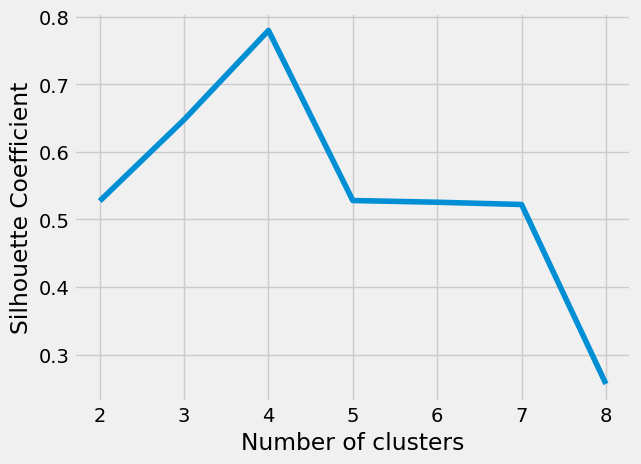

In [29]:
plot_selectK_silhoute(data_scaled,
                    k_min=2, 
                    k_max=9)

Hacemos un utlimo analisis para encontrar el numero ideal de clusters por medio del analisis de plot_selectK_silhoute. Este analisis, nos muestra los valores del coeficiente de la silueta. Podemos ver que este valor va aumentando hasta llegar a un maximo valor en 4 y despues disminuye. Esto nos indica que el mejor modelo, con el coeficiente mas cercano a 1 es el mejor modelo. 

Grafica de clusters 
En la siguiente grafica podemos ver de una manera grafica como se distribuyen los clusters con este modelo. Como mencionado aneriormente, el numero seleccionado como el numero ideal de clusters fue 4. Se vuelve a plantear el modelo y se muestra la grafica a continuacion. 

In [30]:
kmeans = KMeans(n_clusters=4, random_state=0) 
res_kmeans = kmeans.fit(data_scaled[data_scaled.columns])
res_kmeans.labels_

array([0, 1, 0, ..., 3, 3, 0], shape=(8950,), dtype=int32)

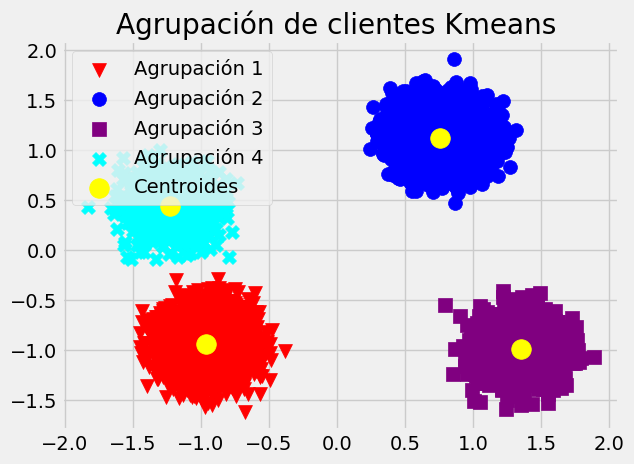

In [31]:
# Ver gráficamente en dos dimensiones -de acuerdo con el análisis de la gráfica anterior- las diferentes agrupaciones para poderlas describir mejor
plt.scatter(cols_number[labels == 0, 0], cols_number[labels == 0, 1], s = 100, marker='v', c = 'red', label = 'Agrupación 1')
plt.scatter(cols_number[labels == 1, 0], cols_number[labels == 1, 1], s = 100, marker='o', c = 'blue', label = 'Agrupación 2')
plt.scatter(cols_number[labels == 2, 0], cols_number[labels == 2, 1], s = 100, marker='s', c = 'purple', label = 'Agrupación 3')
plt.scatter(cols_number[labels == 3, 0], cols_number[labels == 3, 1], s = 100, marker='X', c = 'cyan', label = 'Agrupación 4')

plt.scatter(res_kmeans.cluster_centers_[:, 0], res_kmeans.cluster_centers_[:, 1],  s=200, c='yellow', marker='o', label='Centroides')
plt.title('Agrupación de clientes Kmeans ')
plt.legend(loc='upper left')  
plt.show()

Los siguientes boxplots muestran la distribución de cada variable dentro de los distintos clusters obtenidos mediante la agrupación. Estas visualizaciones nos permiten analizar cómo se diferencian los grupos con respecto a cada variable y detectar posibles valores atípicos. En la mayoria de las variables podemos ver como cada uno de los clusters toma unos valores muy diferentes, mostrando claramente la division de cada uno de los grupos. Podemos observar la mediana, los cuartiles y los valores atípicos en cada cluster, lo que nos ayuda a identificar patrones y diferencias significativas entre los grupos. 

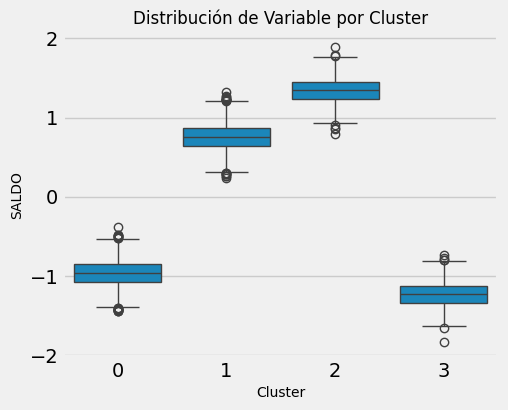

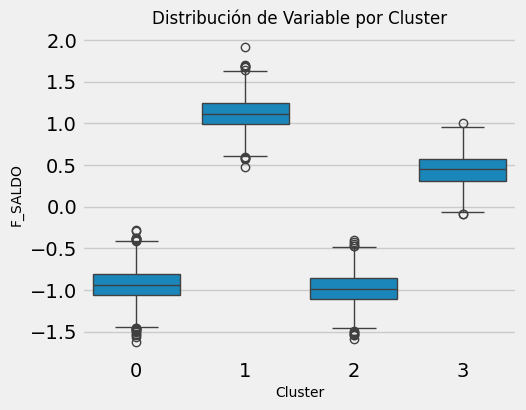

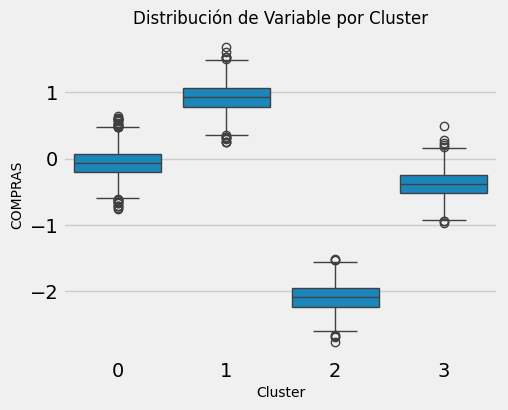

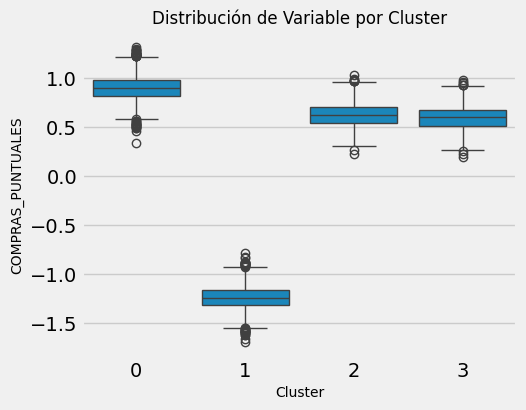

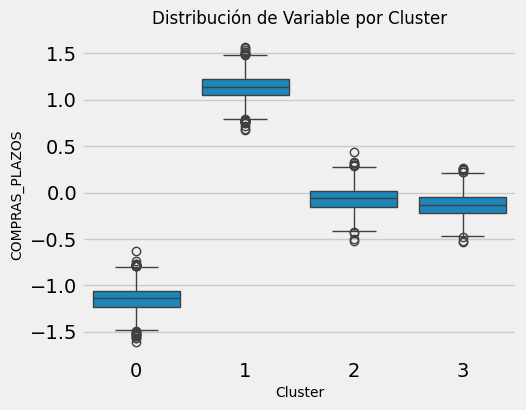

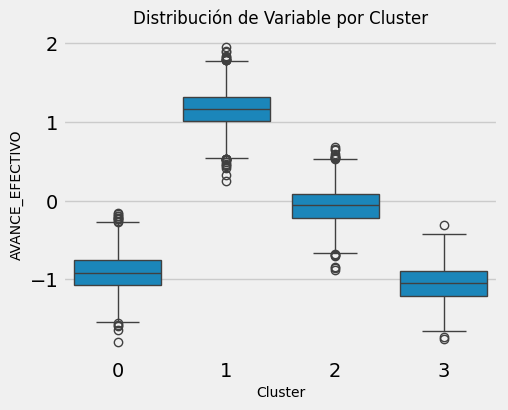

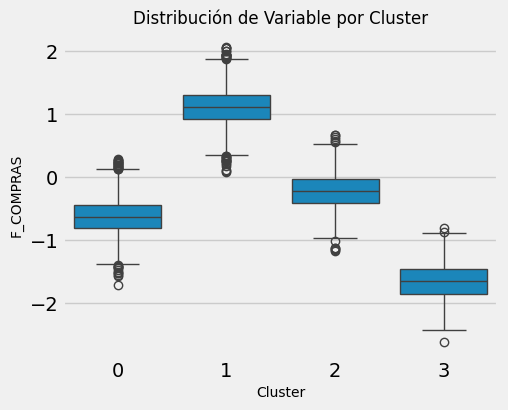

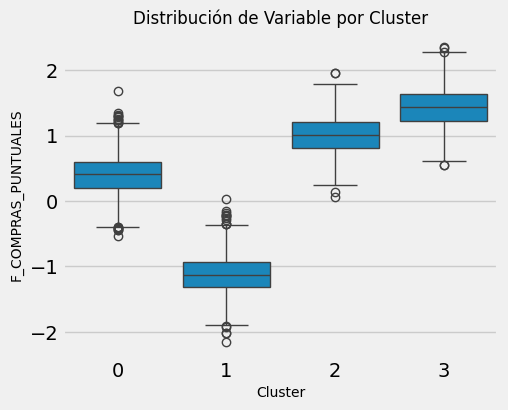

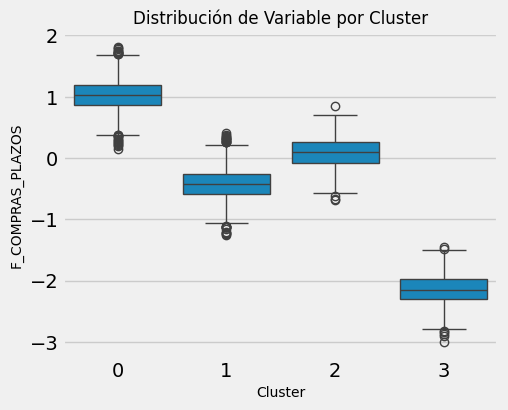

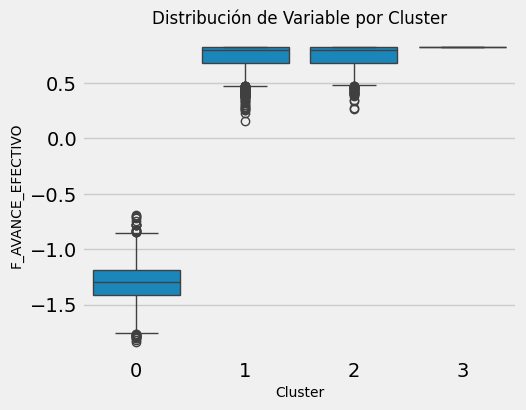

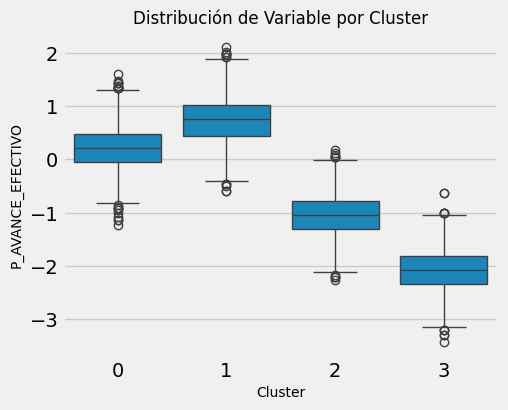

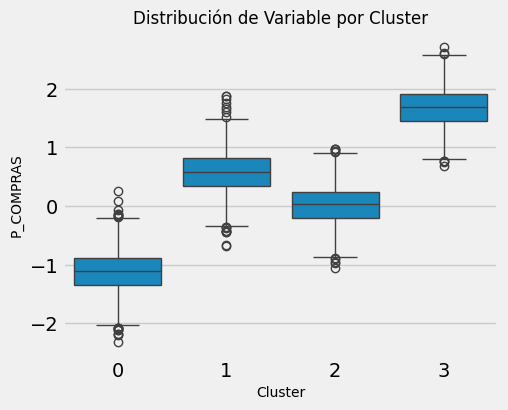

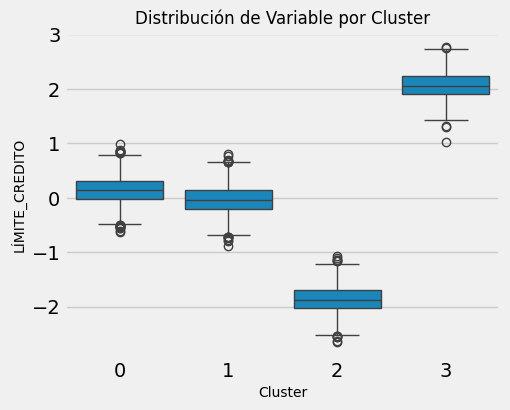

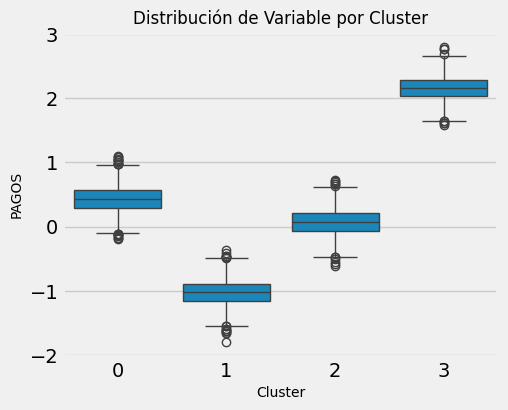

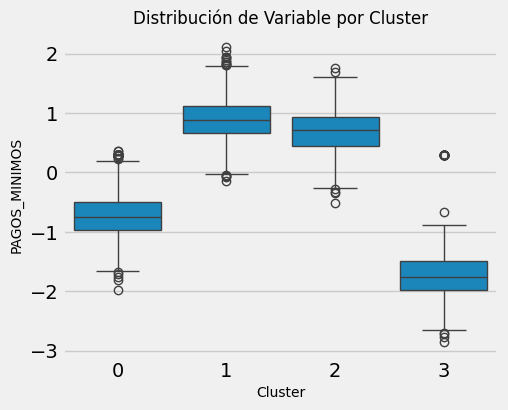

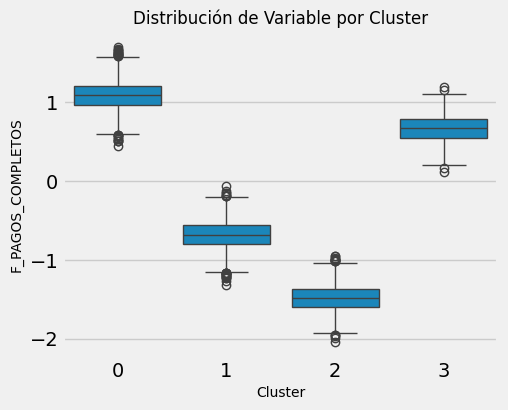

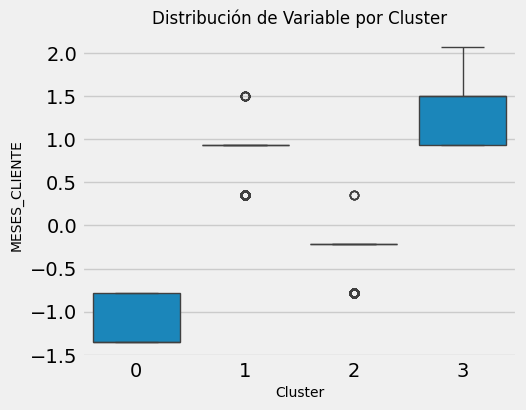

In [32]:
for col in data_scaled.columns:
    if col != 'Cluster':
        plt.figure(figsize=(5,4))
        sns.boxplot(x=data_scaled['Cluster'], y=data_scaled[col])  
        plt.title("Distribución de Variable por Cluster", fontsize=12)
        plt.xlabel("Cluster", fontsize=10)  
        plt.ylabel(col, fontsize=10)
        plt.show()




Como una metrica extra para la evaluacion del rendimiento del modelo calculamos su inercia. La inercia del modelo nos indica que tan compactos son los clusters formados por el modelo de kmeans. Se suma la distancia al cuadrado de ce cada punto a su centroide mas cercano. Si el valor es muy bajo, los puntos dentro de cada cluster estan cerca a su centroide lo que nos muestra clusters compactos. Si la inercia es alta, puede significar que los clusters estan muy dispersos o posiblemente mal definido la cantidad de clusters. 

In [33]:
inertia_value = kmeans.inertia_
print(f"Inercia del modelo K Means: {inertia_value:.2f}")


Inercia del modelo K Means: 9291.29


# DBSCAN

DBSCAN es un algoritmo basado en densidad. Este algoritmo clasifica los datos en 3 categorías. La primera son los puntos núcleo. Estos son puntos que tienen al menos un numero dado de vecinos (min samples) que se encuentran dentro de un radio dado (eps). Estos puntos representan el centro de los grupos. La segunda categoría son los puntos de borde y estos son los que se encuentran dentro del radio (eps) pero no tienen suficientes vecinos como para ser puntos núcleo. Finalmente está la categoría de los outliers y estos son los puntos que no perteneces a ningún cluster o grupo.

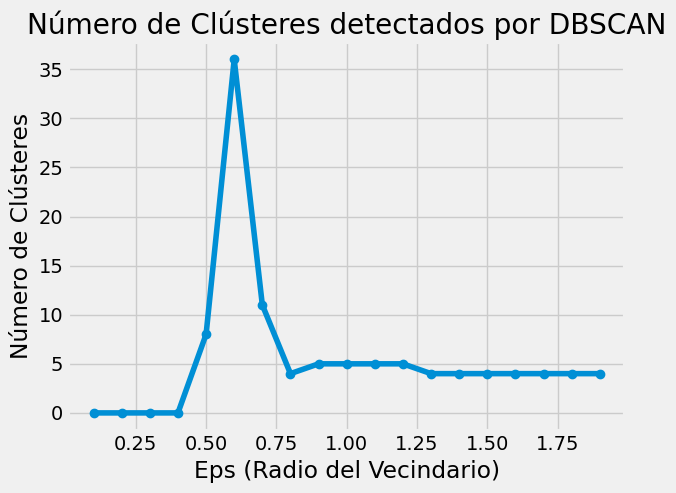

In [34]:

def plot_dbscan_clusters(data, eps_min=0.1, eps_max=2.0, step=0.1, min_samples=5):
    eps_values = np.arange(eps_min, eps_max, step)
    n_clusters = []

    for eps in eps_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data)
        num_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Excluye ruido (-1)
        n_clusters.append(num_clusters)

    # Graficar el número de clústeres detectados según eps
    plt.plot(eps_values, n_clusters, marker='o')
    plt.xlabel('Eps (Radio del Vecindario)')
    plt.ylabel('Número de Clústeres')
    plt.title('Número de Clústeres detectados por DBSCAN')
    plt.show()

# Llamar a la función con datos escalados
plot_dbscan_clusters(data_scaled[data_scaled.columns], eps_min=0.1, eps_max=2.0, step=0.1)


## Interpretación de la gráfica

En la gráfica se puede ver como cuando el radio (eps) es muy pequeño se encuentran 0 grupos ya que todos los datos se interpretan como outliers. Cuándo el radio crece y está cerca a 0.6 se obtienen muchos grupos y esto sucede porque se están agrupando muy pocos datos. Sin embargo, el comportamiento se empieza a parecer a k-means ya que el número de grupos comienza a bajar. Cuán el radio llega a valores de 0.75 o superiores se puede ver como el número de grupos se estabiliza en 5 o ligeramente inferior. Por esto, identificamos que el punto de codo está cerca a este valor.

In [35]:
optimal_eps = 1.0
dbscan = DBSCAN(eps=optimal_eps, min_samples=5)
labels = dbscan.fit_predict(data_scaled[data_scaled.columns])

<Axes: xlabel='Cluster'>

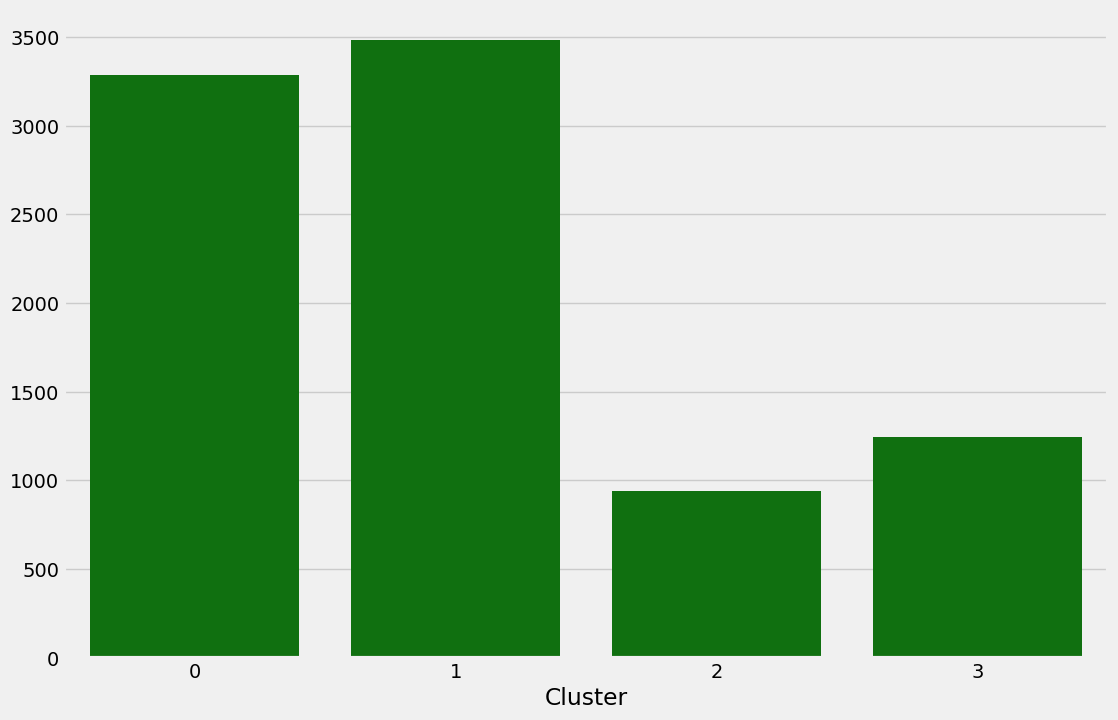

In [36]:
labels = res_kmeans.labels_
data_scaled['Cluster'] = labels

cluster_distrib = data_scaled['Cluster'].value_counts()

fig=plt.figure(figsize=(12,8))
sns.barplot(x=cluster_distrib.index, y=cluster_distrib.values, color = 'green')

In [37]:
data_scaled.groupby('Cluster').count()

,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
Cluster,,,,,,,,,,,,,,,,,
0,3284,3284,3284,3284,3284,3284,3284,3284,3284,3284,3284,3284,3284,3284,3284,3284,3284
1,3481,3481,3481,3481,3481,3481,3481,3481,3481,3481,3481,3481,3481,3481,3481,3481,3481
2,938,938,938,938,938,938,938,938,938,938,938,938,938,938,938,938,938
3,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247


Valores iniciales de los grupos, con datos arbitrarios, usados meramente para el entendimiento de un primer modelo. 

Mejor combinación -> Eps: 1.3888888888888888, Min Samples: 3, Silhouette Score: 0.788


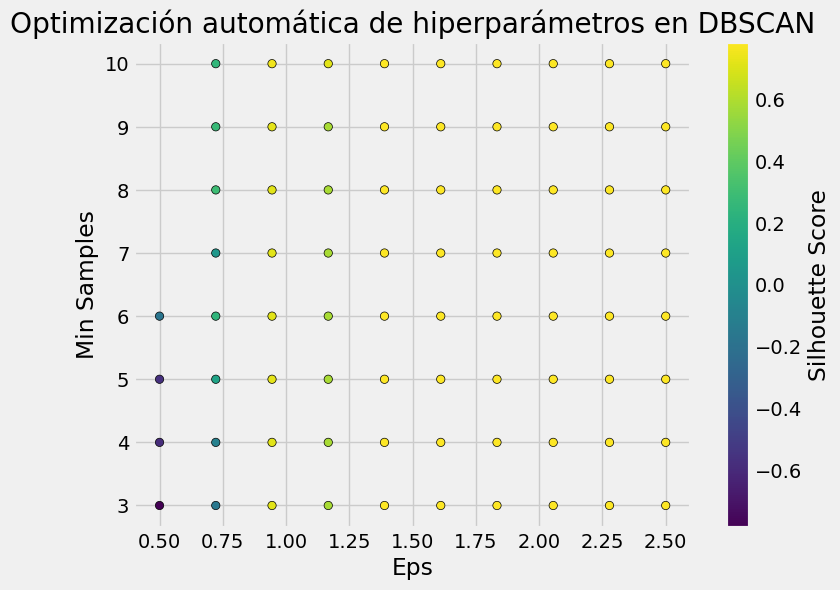

In [38]:

# Definir la cuadrícula de hiperparámetros
from sklearn.model_selection import ParameterGrid


param_grid = {
    'eps': np.linspace(0.5, 2.5, 10),  # 10 valores entre 0.5 y 2.5
    'min_samples': range(3, 11)  # Valores de min_samples de 3 a 10
}

# Variables para almacenar el mejor resultado
best_score = -1
best_params = None
results = []

# Iterar sobre todas las combinaciones de hiperparámetros
for params in ParameterGrid(param_grid):
    dbscan = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])
    cluster_labels = dbscan.fit_predict(data_scaled)

    # Evitar calcular Silhouette si hay solo 1 cluster o puro ruido
    if len(set(cluster_labels)) > 1:
        score = silhouette_score(data_scaled, cluster_labels)
        results.append((params['eps'], params['min_samples'], score))

        if score > best_score:
            best_score = score
            best_params = params

# Mostrar el mejor resultado
print(f"Mejor combinación -> Eps: {best_params['eps']}, Min Samples: {best_params['min_samples']}, Silhouette Score: {best_score:.3f}")

# Graficar los resultados
eps_vals, min_vals, scores = zip(*results)
plt.figure(figsize=(8, 6))
plt.scatter(eps_vals, min_vals, c=scores, cmap='viridis', marker='o', edgecolors='k')
plt.colorbar(label='Silhouette Score')
plt.xlabel('Eps')
plt.ylabel('Min Samples')
plt.title('Optimización automática de hiperparámetros en DBSCAN')
plt.grid(True)
plt.show()



Silhouette Score: 0.788
[0 1 2 3]


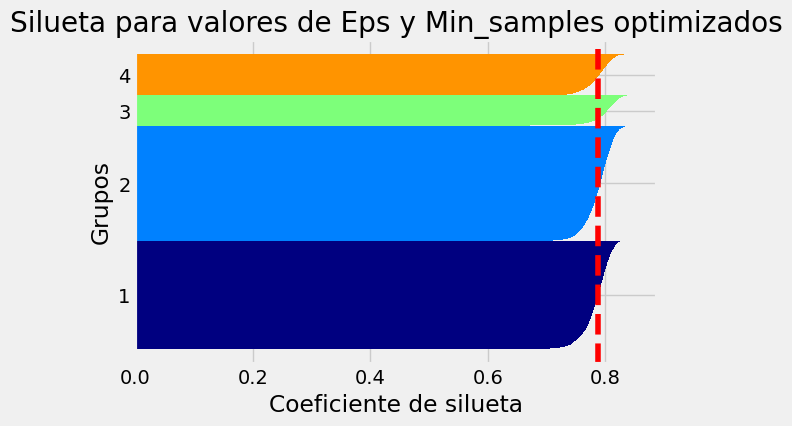

In [39]:
dbscan = DBSCAN(eps=1.3888888888888888, min_samples=3)
cluster_labels = dbscan.fit_predict(data_scaled)
print(f"Silhouette Score: {silhouette_score(data_scaled, cluster_labels):.3f}")
plt.figure(figsize=(6, 4))
plot_silhouette(data=data_scaled, labels=cluster_labels, title=f'Silueta para valores de Eps y Min_samples optimizados')

Despues de realizar una variación de los hipermarámetros "eps" y "min_samples" obtuvimos un Silhouette Score de 0.788 con unos valores de 1.3888888888888888 para eps y de 3 para min samples.

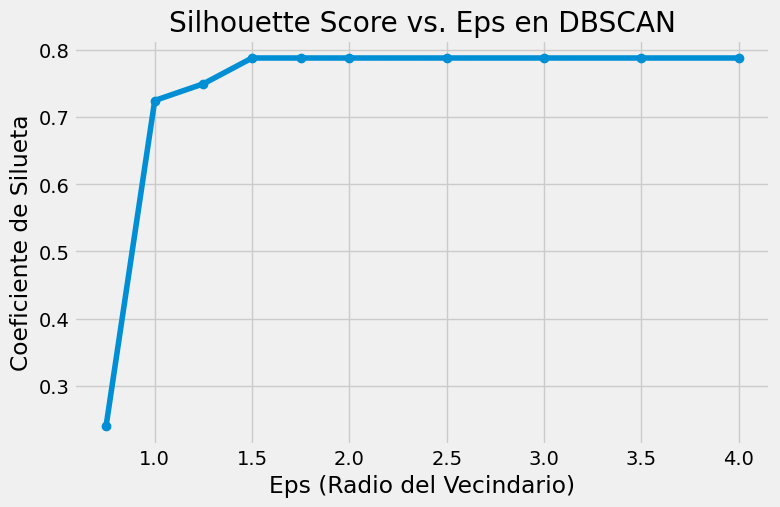

In [40]:
# Rango de valores de eps a probar
eps_values = [0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.5, 3, 3.5, 4, 10]# Ajusta según tu dataset
silhouette_scores = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    cluster_labels = dbscan.fit_predict(data_scaled)

    # Evitar calcular el Silhouette Score si hay solo un cluster o mucho ruido
    if len(set(cluster_labels)) > 1:
        score = silhouette_score(data_scaled, cluster_labels)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(np.nan)  # Para que no afecte la gráfica

# Graficar los resultados
plt.figure(figsize=(8, 5))
plt.plot(eps_values, silhouette_scores, marker='o', linestyle='-')
plt.xlabel("Eps (Radio del Vecindario)")
plt.ylabel("Coeficiente de Silueta")
plt.title("Silhouette Score vs. Eps en DBSCAN")
plt.grid(True)
plt.show()


Basandonos en la gráficas de coeficientes de silueta es posible notar que se obtiene un valor cercanoa a 0.8, que en concreto es de 0.788 que llega a un máximo con un eps de 1.5 pero que a la medida que el eps aumenta no se reduce sino que se mantiene constante. Por este motivo se decide conservar a 1.5 cómo el valor óptimo de eps para este algoritmo aunque otros valores nos den resultados iguales para este dataset. 

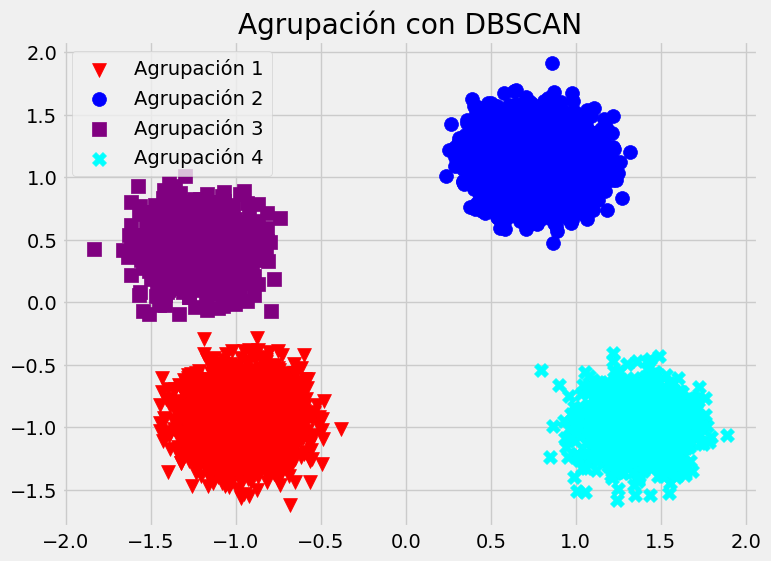

In [41]:


# Aplicar DBSCAN
dbscan = DBSCAN(eps=1.3888888888888888, min_samples=3)  # Ajusta eps según tu análisis previo
labels = dbscan.fit_predict(cols_number)

# Definir colores y marcadores para cada cluster
unique_labels = set(labels)
colors = ['red', 'blue', 'purple', 'cyan', 'green', 'orange', 'pink']
markers = ['v', 'o', 's', 'X', 'P', 'D', '*']

plt.figure(figsize=(8, 6))

# Graficar cada cluster
for label, color, marker in zip(unique_labels, colors, markers):
    if label == -1:
        # Cluster de ruido (-1 en DBSCAN)
        plt.scatter(cols_number[labels == label, 0], cols_number[labels == label, 1], 
                    s=100, marker='x', c='black', label='Ruido')
    else:
        plt.scatter(cols_number[labels == label, 0], cols_number[labels == label, 1], 
                    s=100, marker=marker, c=color, label=f'Agrupación {label + 1}')

plt.title('Agrupación con DBSCAN')
plt.legend(loc='upper left')  
plt.show()


Este diagrama de agrupaciones visualizado en un plano en 2D nos permite darnos cuenta que tenemos un modelo sólido. El algoritmo nos arrojó 4 grupos distintos que estan claramente diferenciados y que fueron designados con distintos colores para facilitar su visualización. En el caso de DBSCAN no tenemos centroides así que no hay puntos específicos de referencia para cada grupo pero realmente si es fácil notar que hay 4 "bolas" o cículos de datos que son nuestros 4 grupos hayados.

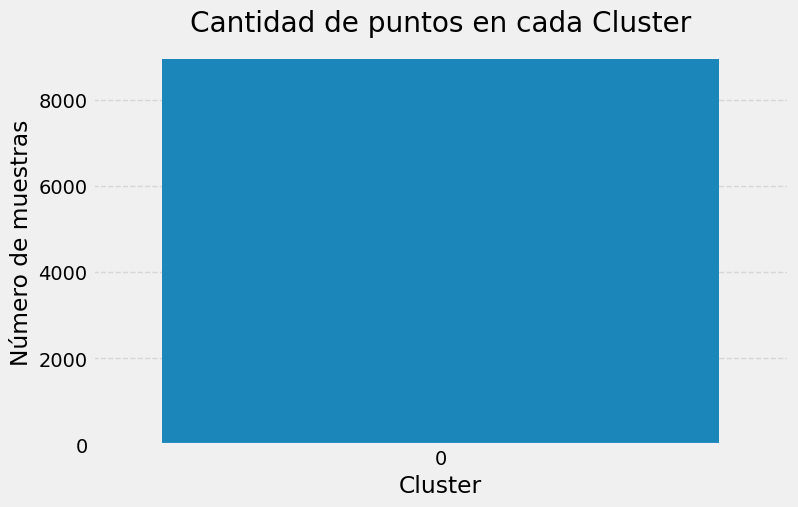

In [ ]:
cluster_counts = pd.Series(labels).value_counts().sort_index()

# Graficar el histograma
plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values)

# Etiquetas y título
plt.xlabel('Cluster')
plt.ylabel('Número de muestras')
plt.title('Cantidad de puntos en cada Cluster')
plt.xticks(rotation=0)  # Rotar etiquetas si hay muchos clusters
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [43]:
data_scaled.groupby('Cluster').count()

,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
Cluster,,,,,,,,,,,,,,,,,
0,3284,3284,3284,3284,3284,3284,3284,3284,3284,3284,3284,3284,3284,3284,3284,3284,3284
1,3481,3481,3481,3481,3481,3481,3481,3481,3481,3481,3481,3481,3481,3481,3481,3481,3481
2,938,938,938,938,938,938,938,938,938,938,938,938,938,938,938,938,938
3,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247


### Conclusión DBSCAN

DBSCAN demostró ser un modelo bastante sólido ya que diferenció claramente 4 grupos que de hecho, por la representación gráfica parecen ser muy similares a los que identificó K-means a pensar de no utilizar centroides en su algoritmo. Algo interesante de este algoritmo es que los grupos con datos arbitrarios de principio y con datos optimizados mediante la variación de hiperparámetros fueron los mismos. Es válido aclarar que esto es para este dataset y que probablemente esta afirmación no es cierta para la mayoría de datasets. De cualquier manera, se obtuvo un coeficiente de silueta del 0.788, lo cuál es un buen indicador de nuestro modelo de agrupación.

# MeanShift
Mean Shift es un algoritmo basado en densidad que no requiere especificar el número de clusters de antemano sino que se pueden calcular. En su lugar, encuentra los centros de densidad (modas) en los datos y asigna los puntos a los clusters correspondientes.

In [44]:
# Estimar el bandwidth automáticamente
bandwidth = estimate_bandwidth(data_scaled, quantile=0.2, n_samples=500)
print(f"Bandwidth estimado: {bandwidth}")


Bandwidth estimado: 2.679412953107175


In [45]:
# Aplicar Mean Shift con el bandwidth estimado
mean_shift = MeanShift(bandwidth=bandwidth)
labels_mean_shift = mean_shift.fit_predict(data_scaled)


In [46]:
# Número de clusters encontrados
n_clusters = len(np.unique(labels_mean_shift))
print(f"Número de clusters encontrados: {n_clusters}")


Número de clusters encontrados: 4


Coeficiente de silueta para Mean Shift: 0.794


/var/folders/zp/n5brtxpj49d0g2j2vx4jdhc40000gn/T/ipykernel_19938/3099211025.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_scaled['Cluster_MeanShift'], palette='viridis')


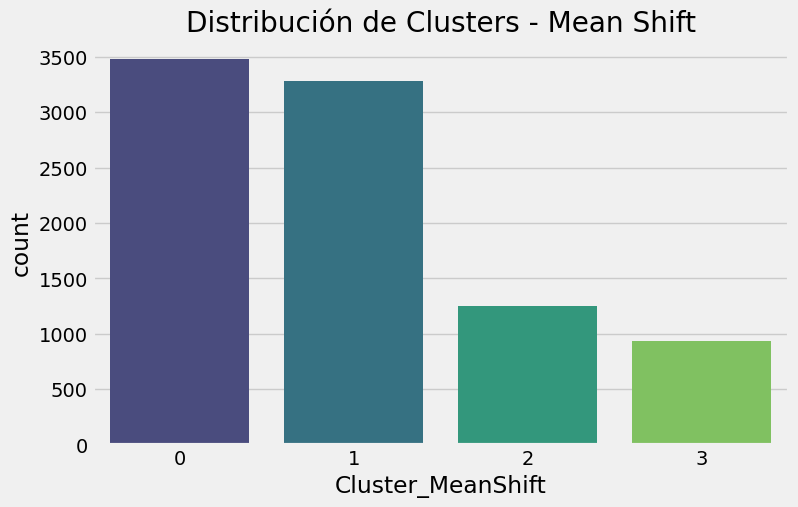

In [47]:
# Añadir las etiquetas al dataframe
data_scaled['Cluster_MeanShift'] = labels_mean_shift

# Calcular el coeficiente de silueta
silhouette_avg_mean_shift = silhouette_score(data_scaled, labels_mean_shift)
print(f"Coeficiente de silueta para Mean Shift: {silhouette_avg_mean_shift:.3f}")

plt.figure(figsize=(8, 5))
sns.countplot(x=data_scaled['Cluster_MeanShift'], palette='viridis')
plt.title('Distribución de Clusters - Mean Shift')
plt.show()

### Interpretación
Evidenciamos que MeanShift calculó 4 como el número óptimo de clusters, esto fue el mismo resultado para los algoritmos anteriores, por lo que podemos concluir que este algoritmo nos puede servir.

In [51]:
# Convertimos los datos escalados a un arreglo para proesarlo
data_scaled = scaler.fit_transform(data_df_numeric)

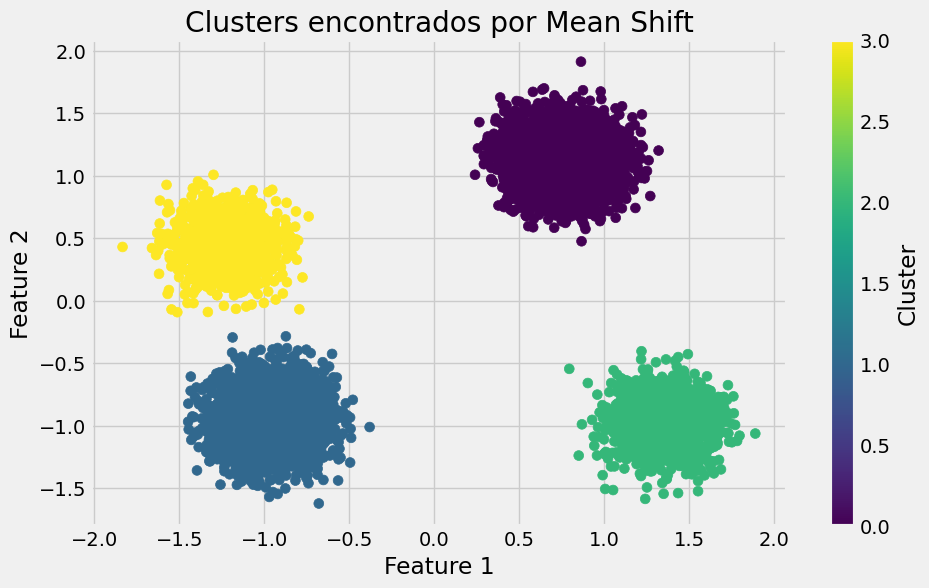

In [52]:
# Visualización en 2D (usando las dos primeras columnas)
plt.figure(figsize=(10, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels_mean_shift, cmap='viridis', s=50)
plt.title('Clusters encontrados por Mean Shift')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
# Definir la cuadrícula de hiperparámetros
param_grid = {
    'bandwidth': np.linspace(0.5, 2.5, 10),  # 10 valores entre 0.5 y 2.5
    'min_bin_freq': [1, 5, 10],  # Valores de min_bin_freq
    'cluster_all': [True, False]  # Probar con y sin cluster_all
}

# Variables para almacenar el mejor resultado
best_score = -1
best_params = None
results = []

In [54]:
# Iterar sobre todas las combinaciones de hiperparámetros
for params in ParameterGrid(param_grid):
    mean_shift = MeanShift(bandwidth=params['bandwidth'],
                          min_bin_freq=params['min_bin_freq'],
                          cluster_all=params['cluster_all'])
    cluster_labels = mean_shift.fit_predict(data_scaled)

    # Evitar calcular Silhouette si hay solo 1 cluster o puro ruido
    if len(set(cluster_labels)) > 1:
        score = silhouette_score(data_scaled, cluster_labels)
        results.append((params['bandwidth'], params['min_bin_freq'], params['cluster_all'], score))

        if score > best_score:
            best_score = score
            best_params = params

# Mostrar el mejor resultado
print(f"Mejor combinación -> Bandwidth: {best_params['bandwidth']:.3f}, "
      f"Min Bin Freq: {best_params['min_bin_freq']}, "
      f"Cluster All: {best_params['cluster_all']}, "
      f"Silhouette Score: {best_score:.3f}")

Mejor combinación -> Bandwidth: 1.611, Min Bin Freq: 1, Cluster All: True, Silhouette Score: 0.771


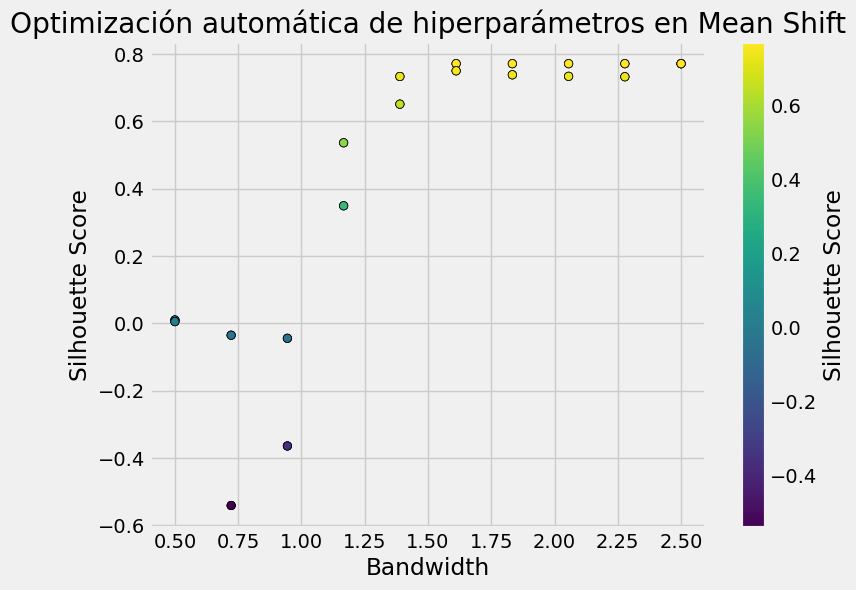

In [55]:
# Graficar los resultados (solo bandwidth vs. score para simplificar)
bandwidth_vals = [r[0] for r in results]
scores = [r[3] for r in results]

plt.figure(figsize=(8, 6))
plt.scatter(bandwidth_vals, scores, c=scores, cmap='viridis', marker='o', edgecolors='k')
plt.colorbar(label='Silhouette Score')
plt.xlabel('Bandwidth')
plt.ylabel('Silhouette Score')
plt.title('Optimización automática de hiperparámetros en Mean Shift')
plt.grid(True)
plt.show()

In [63]:
import matplotlib.cm as cm# Entrenar Mean Shift con los mejores hiperparámetros
best_mean_shift = MeanShift(bandwidth=best_params['bandwidth'],
                            min_bin_freq=best_params['min_bin_freq'],
                            cluster_all=best_params['cluster_all'])
cluster_labels = best_mean_shift.fit_predict(data_scaled)

In [64]:
# Calcular el coeficiente de silueta promedio
silhouette_avg = silhouette_score(data_scaled, cluster_labels)
print(f"Coeficiente de silueta promedio: {silhouette_avg:.3f}")

Coeficiente de silueta promedio: 0.771


In [65]:
# Calcular los valores de silueta para cada muestra
sample_silhouette_values = silhouette_samples(data_scaled, cluster_labels)

In [66]:
# Crear la gráfica de silueta
plt.figure(figsize=(10, 7))
y_lower = 10  # Espacio entre clusters

<Figure size 1000x700 with 0 Axes>

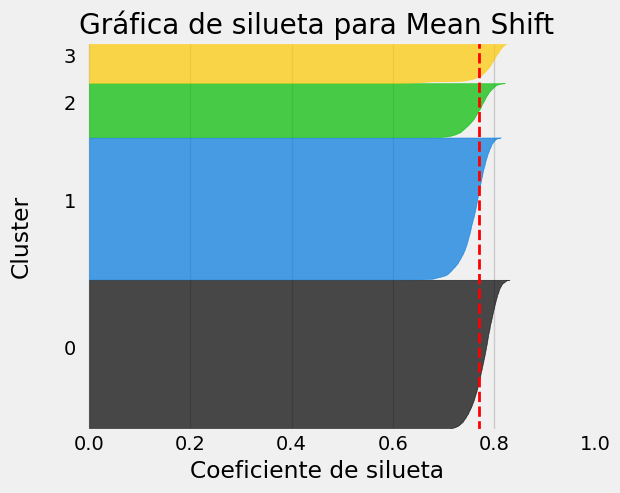

In [67]:
# Iterar sobre cada cluster
n_clusters = len(np.unique(cluster_labels))
for i in range(n_clusters):
    # Agrupar los valores de silueta para el cluster actual
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    # Calcular el tamaño del cluster
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # Rellenar el área correspondiente al cluster
    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Etiquetar el cluster
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # Espacio para el siguiente cluster

# Línea vertical para el coeficiente de silueta promedio
plt.axvline(x=silhouette_avg, color="red", linestyle="--", linewidth=2)
# Configurar la gráfica
plt.title("Gráfica de silueta para Mean Shift")
plt.xlabel("Coeficiente de silueta")
plt.ylabel("Cluster")
plt.yticks([])  # Ocultar etiquetas del eje Y
plt.xlim([-0.1, 1])  # Rango del coeficiente de silueta
plt.ylim([0, len(data_scaled) + (n_clusters + 1) * 10])  # Ajustar límites del eje Y
plt.show()

Número de clusters encontrados: 4


/var/folders/zp/n5brtxpj49d0g2j2vx4jdhc40000gn/T/ipykernel_19938/1111608622.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_scaled_df['Cluster_MeanShift'], palette='viridis')


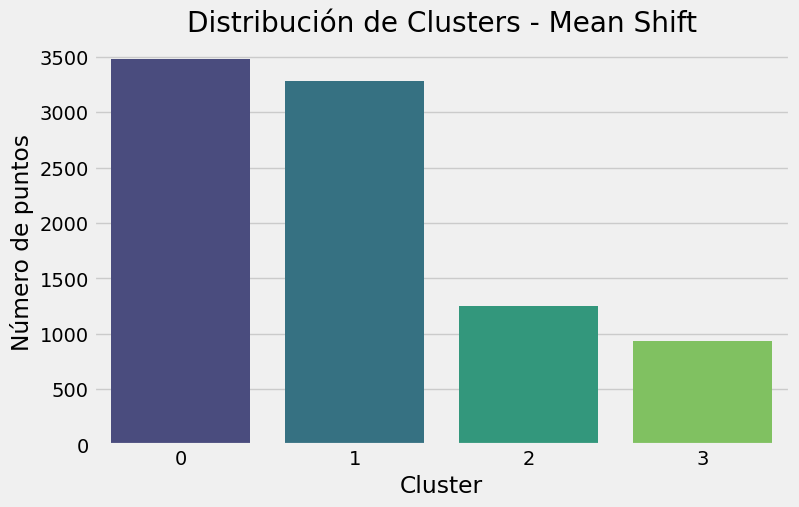

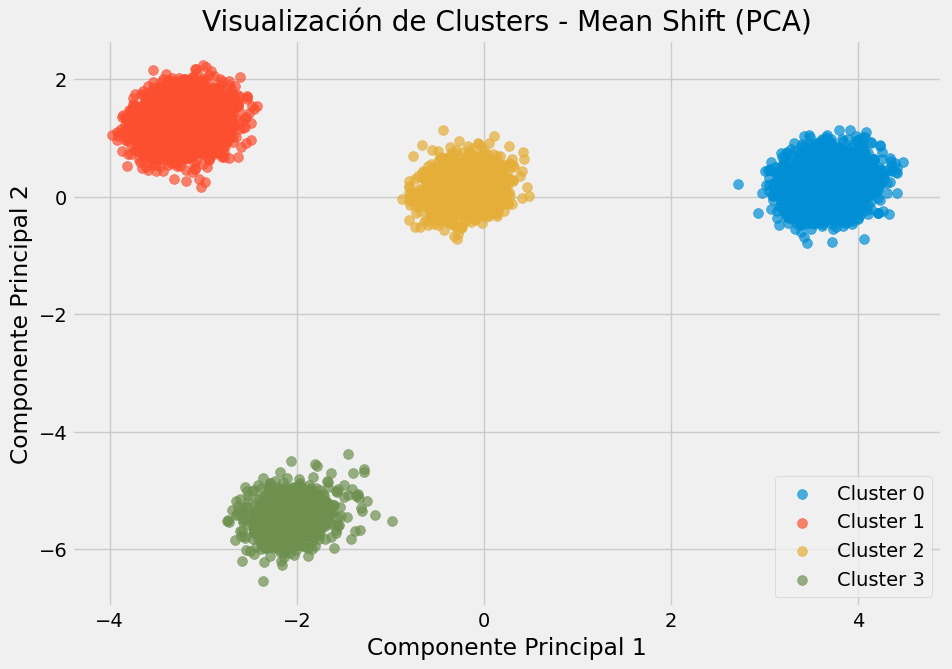

In [ ]:
# Entrenar Mean Shift con los mejores hiperparámetros
best_mean_shift = MeanShift(bandwidth=1.611, min_bin_freq=1, cluster_all=True)
cluster_labels = best_mean_shift.fit_predict(data_scaled)

# Convertir data_scaled a un DataFrame de Pandas
data_scaled_df = pd.DataFrame(data_scaled, columns=data_df_numeric.columns)

# Añadir las etiquetas de los clusters al DataFrame
data_scaled_df['Cluster_MeanShift'] = cluster_labels

# Ver el número de clusters encontrados
n_clusters = len(np.unique(cluster_labels))
print(f"Número de clusters encontrados: {n_clusters}")

# Visualizar la distribución de los clusters
plt.figure(figsize=(8, 5))
sns.countplot(x=data_scaled_df['Cluster_MeanShift'], palette='viridis')
plt.title('Distribución de Clusters - Mean Shift')
plt.xlabel('Cluster')
plt.ylabel('Número de puntos')
plt.show()

# Reducir la dimensionalidad para visualización (usando PCA)
pca = PCA(n_components=2)  # Reducir a 2 dimensiones
data_pca = pca.fit_transform(data_scaled_df.drop(columns=['Cluster_MeanShift']))


Número de clusters encontrados: 4


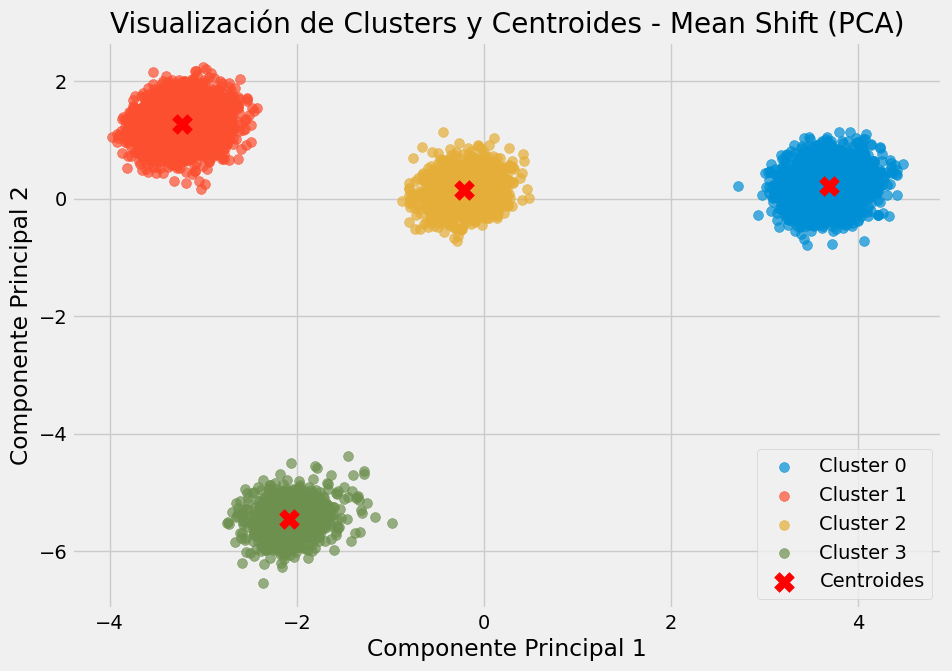

In [ ]:
# Entrenar Mean Shift con los mejores hiperparámetros
best_mean_shift = MeanShift(bandwidth=1.611, min_bin_freq=1, cluster_all=True)
cluster_labels = best_mean_shift.fit_predict(data_scaled)

# Convertir data_scaled a un DataFrame de Pandas
data_scaled_df = pd.DataFrame(data_scaled, columns=data_df_numeric.columns)

# Añadir las etiquetas de los clusters al DataFrame
data_scaled_df['Cluster_MeanShift'] = cluster_labels

# Ver el número de clusters encontrados
n_clusters = len(np.unique(cluster_labels))
print(f"Número de clusters encontrados: {n_clusters}")

# Reducir la dimensionalidad para visualización (usando PCA)
pca = PCA(n_components=2)  # Reducir a 2 dimensiones
data_pca = pca.fit_transform(data_scaled_df.drop(columns=['Cluster_MeanShift']))

# Calcular los centroides (medias) de cada cluster en el espacio PCA
centroids = []
for cluster in np.unique(cluster_labels):
    centroids.append(np.mean(data_pca[cluster_labels == cluster], axis=0))
centroids = np.array(centroids)

# Graficar los clusters en 2D
plt.figure(figsize=(10, 7))
for cluster in np.unique(cluster_labels):
    plt.scatter(data_pca[cluster_labels == cluster, 0],
                data_pca[cluster_labels == cluster, 1],
                label=f'Cluster {cluster}', s=50, alpha=0.7)

# Graficar los centroides
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroides')

plt.title('Visualización de Clusters y Centroides - Mean Shift (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.show()